# Part II - Ford GoBike Data Visualization
## by (Olga Kurguzova)

## Investigation Overview

In this investigation, I wanted to look at the differences in the use of Ford GoBike service for customers and subscribers in terms of: when they use the service, how long their trips lasted and the influence of gender and age  



## Dataset Overview

This dataset includes information on 174,278 individual trips made in the "Ford GoBike" bike sharing system covering the greater San Francisco Bay area for February 2019. the data set also includes information about the duration of trips, the availability of a subscription to the system, the start and end date of the trip, the gender and age of the user

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
go_bikes_master = pd.read_csv('go_bikes_master.csv')

## User type destribution

Most of users Ford GoBike service are subscribers (91%)

 

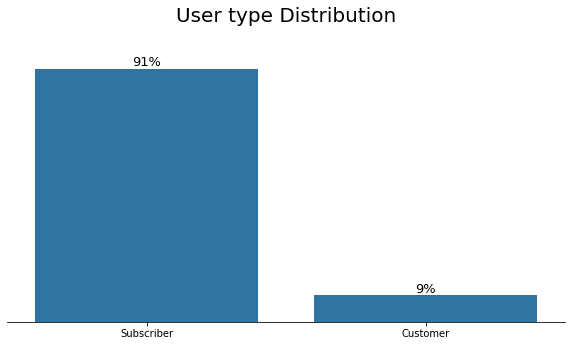

In [4]:
fig, ax = plt.subplots(figsize = (10,5))
base_color = sb.color_palette()[0]

sb.countplot(x = "user_type", data = go_bikes_master, 
              order = go_bikes_master['user_type'].value_counts().index,
              color = base_color)

# Calculate % for each user types 
perc_list = []
type_sum = go_bikes_master['user_type'].value_counts().to_list()
total_sum = go_bikes_master.shape[0]
for i in range(0,len(type_sum)):
    percent = int(round(100 * type_sum[i] / total_sum))
    perc_list.append(percent) 
# Annotate bars
i=0
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", color='black', size=13)
    i+=1
plt.ylim([0, 170000])
plt.title('User type Distribution\n', size=20)
sb.despine(fig, left = True)
cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
plt.xlabel("");

## Gender destribution by user types

The majority of users are men both among subscribers and customers

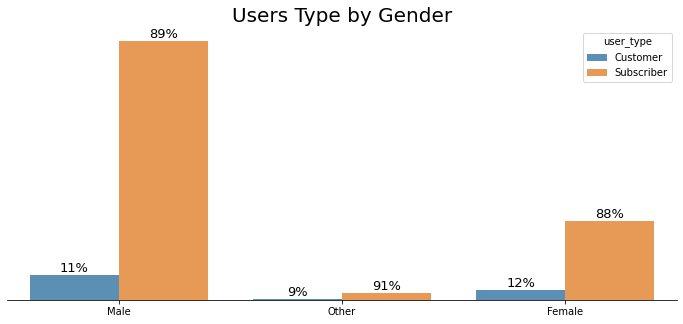

In [10]:
fig, ax = plt.subplots(figsize = (12,5))
sb.countplot(x = "member_gender", data = go_bikes_master, 
               hue = "user_type", alpha = 0.8)
# Percentage for each gender
perc_list_customer, perc_list_subscriber, perc_list = [], [], []
type_sum = go_bikes_master.groupby('member_gender')['user_type'].value_counts().sort_index().to_list()
total_sum = go_bikes_master['member_gender'].value_counts().sort_index().to_list()

# arrange the % list in same as annotate loop order
for i in range(0,len(total_sum)):
    perc_customer = int(round(100 * type_sum[2*i] / total_sum[i]))
    perc_list_customer.append(perc_customer)
for i in range(0,len(total_sum)):
    perc_subscriber = int(round(100 * type_sum[2*i+1]/ total_sum[i]))
    perc_list_subscriber.append(perc_subscriber)
perc_list = perc_list_customer + perc_list_subscriber

# annotate each bar
i=0
for p in ax.patches:
    ax.annotate('{:.0f}%'.format(perc_list[i]), 
                (p.get_x()+p.get_width()/2, p.get_height()), 
                ha="center", va="bottom", color='black', size=13)
    i+=1

cur_axes = plt.gca()
cur_axes.axes.get_yaxis().set_visible(False)
sb.despine(fig, left = True)
plt.title('Users Type by Gender', fontsize= 20)
plt.xlabel('');

## Time and date of the start of trips by user types

Subscribers mostly use the service during the working week, especially in the evening, while customers use the service throughout the week, especially around noon on weekends. Perhaps subscribers used the service to travel to work or at work, and customers for entertainment. It is worth noting that the trips of customers on average lasted much longer.

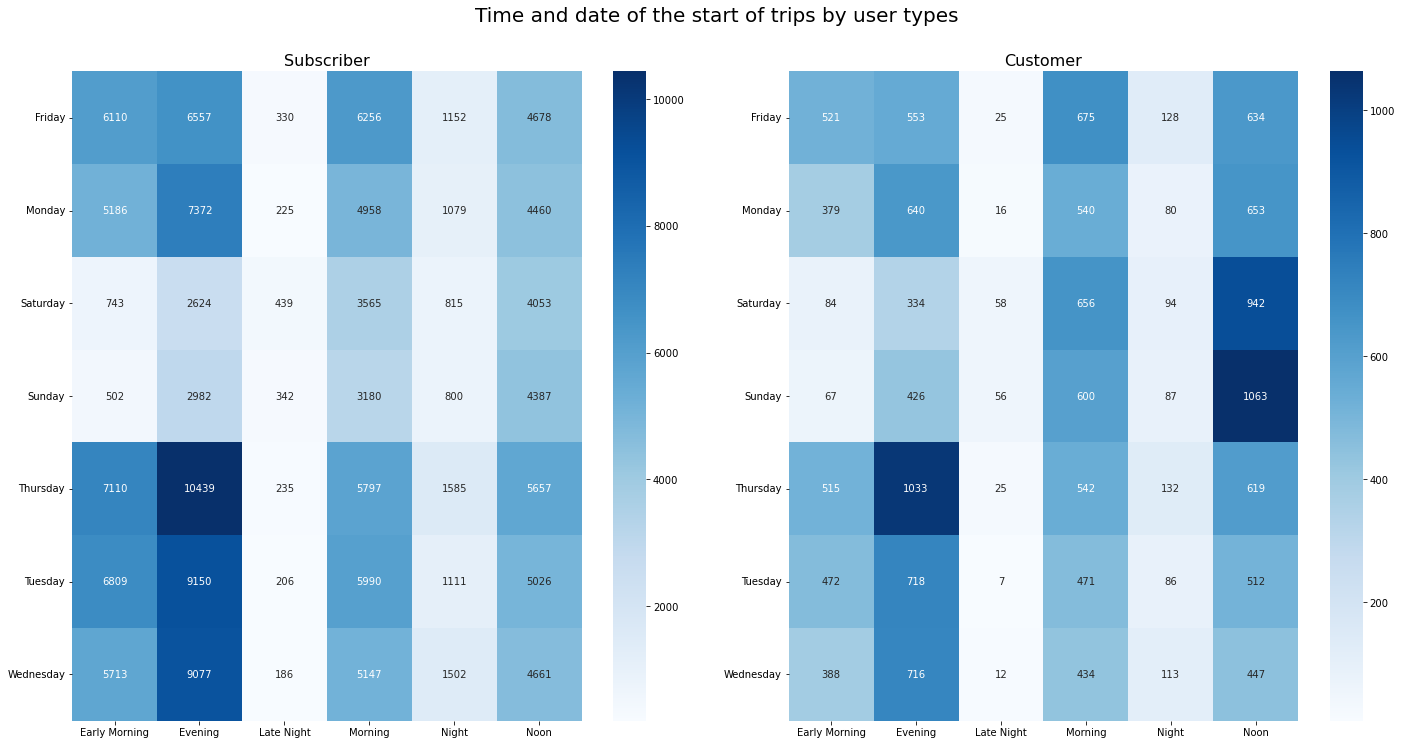

In [9]:
# create dataframe for subscriber
subscriber = go_bikes_master.query('user_type == "Subscriber"').groupby(['time','weekday']
                                                                      ).agg({'bike_id' : 'count'})
subscriber = subscriber.pivot_table(index='weekday', columns='time', values='bike_id')
# create dataframe for customer
customer = go_bikes_master.query('user_type == "Customer"').groupby(['weekday','time']).agg({'bike_id' : 'count'})
customer = customer.pivot_table(index='weekday', columns='time', values='bike_id')
#plot heatmap
plt.subplots(figsize=(20,10))

fig1 = plt.subplot(1,2,1)
ax1 = sb.heatmap(subscriber, annot=True, fmt='d', cmap='Blues')

plt.title('Subscriber',size=16)
plt.yticks(rotation=360)
plt.xlabel('')
plt.ylabel('')

fig2 = plt.subplot(1,2,2)
ax2 = sb.heatmap(customer, annot=True, fmt='d', cmap='Blues')

plt.title('Customer',size=16)
plt.yticks(rotation=360)
plt.tight_layout()
plt.suptitle('Time and date of the start of trips by user types', size=20, y=1.05)
plt.xlabel('')
plt.ylabel('');

## Average Trip Duration per Subscription

It is worth noting that the trips of customers on average lasted much longer

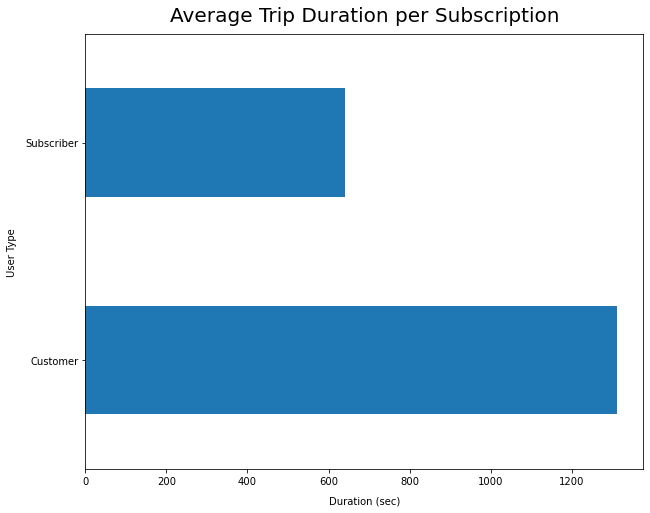

In [6]:
#let's create bar charwith the average duration of trips
ax = go_bikes_master.groupby('user_type')['duration_sec'].mean().plot(kind='barh', figsize=(10,8))
ax.set_title('Average Trip Duration per Subscription', fontsize=20, y=1.015)
ax.set_ylabel('User Type', labelpad=8)
ax.set_xlabel('Duration (sec)', labelpad=10);

In [ ]:
!jupyter nbconvert <Part_II_>.ipynb --to slides --post serve --no-input --no-prompt